# Problem Set 3, Part One: Due Thursday, February 6 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover Problems on Quantile Tests

#### Exercise 3.2.1:

A random sample of tenth-grade boys resulted in the following $20$
observed weights.
<table>
    <tr>
  <td>$142$</td><td>$134$</td><td> $98$</td><td>$119$</td><td>$131$</td>
    </tr>
    <tr>
  <td>$103$</td><td>$154$</td><td>$122$</td><td> $93$</td><td>$137$</td>
    </tr>
    <tr>
  <td> $86$</td><td>$119$</td><td>$161$</td><td>$144$</td><td>$158$</td>
    </tr>
    <tr>
  <td>$165$</td><td> $81$</td><td>$117$</td><td>$128$</td><td>$103$</td>
    </tr>
</table>
Test the hypothesis that the median weight is $103$. [Give a $p$-value.]

$H_0: P(X < 103) = 0.5$

In [3]:
x_i = np.array([142, 134, 98, 119, 131, 103, 154, 122, 93, 137, 86, 119, 161, 144, 158, 165, 81, 117, 128, 103])
n = x_i.shape[0]

pstar = 0.5; xstar = 103
teststat = np.sum(x_i <= xstar); 
print(teststat, n)

6 20


$T \sim Bin(20,0.5)$

In [4]:
alpha = stats.binom.pmf(teststat, n, pstar)

print(alpha)

0.036964416503906236


$\alpha = 0.0369$

#### Exercise 3.2.4:

In Exercise 3.2.1 find an approximate 90% confidence interval for the
median.

In [5]:
x_i.sort()

pstar = 0.5
ci = 0.90
mydist = stats.binom(n, pstar)

r, sm1 = mydist.interval(ci)
r = int(r); s = int(sm1) + 1

print(r, s)
print(x_i[r-1:s])
print(mydist.cdf(s-1) - mydist.cdf(r-1))

6 15
[103 117 119 119 122 128 131 134 137 142]
0.9586105346679688


$CI = [103, 142]$

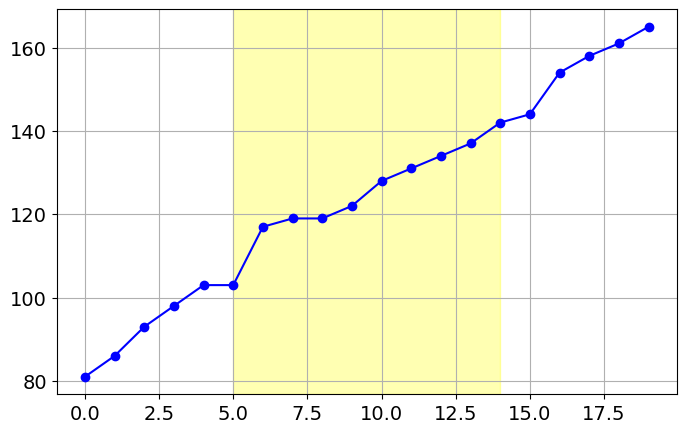

In [6]:
plt.plot(x_i, 'bo-') 
plt.axvspan(r-1, s-1, color='yellow', alpha=0.3)

plt.grid(True);

What is the exact confidence coefficient?

$Pr(r \leq x_{0.5} \leq s) \approx 0.958$

Also compare the
results using the exact method with the results obtained using the large
sample approximation.

In [7]:
mu = mydist.mean(); sigma = mydist.std() 

print(mu, sigma)

zcrit = stats.norm.ppf(ci + (1.0 - ci)/2) 

print(zcrit)

rn = 0.5 + mu - zcrit * sigma 
sn = 0.5 + mu + zcrit * sigma 

print(rn, sn)

fixed_rn, fixed_sn = int(rn), int(sn+1)

print(fixed_rn, fixed_sn)

print(x_i[fixed_rn-1:fixed_sn])

10.0 2.23606797749979
1.6448536269514722
6.821995477099428 14.178004522900572
6 15
[103 117 119 119 122 128 131 134 137 142]


$CI = [103, 142]$

The fixed bounds are exactly the same as the ones computed previous after using continouty correction.

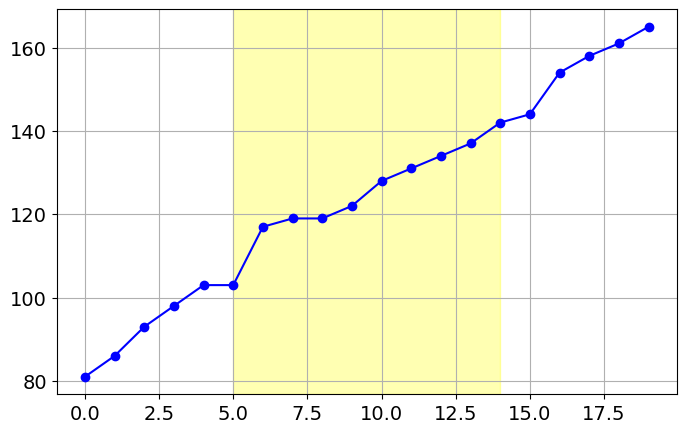

In [8]:
plt.plot(x_i, 'bo-') 
plt.axvspan(fixed_rn-1, fixed_sn-1, color='yellow', alpha=0.3)

plt.grid(True);

#### Problem 3.2.1:

One parametric method for finding a $1-\alpha$ confidence interval for
the median is to assume that the population is normal and use
$${\color{royalblue}{{{\overline{X}}}}} - t_{\alpha/2} {\color{royalblue}{S}}/\sqrt{n-1} < x_{0.5}
< {\color{royalblue}{{{\overline{X}}}}} + t_{\alpha/2} {\color{royalblue}{S}}/\sqrt{n-1}$$
where ${\color{royalblue}{{{\overline{X}}}}}$ is the sample mean,
${\color{royalblue}{S}}$ is the sample standard deviation (Definition 2.2.3),
$n$ is the sample size. and $t_p$ the $p$th quantile from Table A21 \[or
`stats.t.ppf()` or `stats.t.isf()`\], $n-1$ degrees of freedom. Compute
the preceding confidence interval on the data in Exercise 3.2.1 and compare
it with the nonparametric confidence intervals of Exercise 3.2.4, where
$\alpha=0.10$.

In [9]:
x_bar = x_i.mean()
s = x_i.std(ddof=1)

t_statisict = stats.t.isf((1.0-ci)/2, df=n-1)

lcb = x_bar - t_statisict * (s / np.sqrt(n-1))
ucb = x_bar + t_statisict * (s / np.sqrt(n-1))

print(lcb, ucb)

114.75258078973856 134.74741921026146


$CI = [114, 134]$

The CI is much more narrow.

Which confidence interval is easier to justify?

I would find this interval easier to justify because this is how I would think about the estimating the median of a distribution with a mean and variance. You would naturally expect the mean to be close to the median for a large number of samples, therefore it is intuitive to constrain it to the bounds of mean based confidence interval.

Which confidence interval is “better” (in terms of being shorter)?

This confidence interval is "better" because it is much shorter.

### Conover Problems on The Sign Test

####  Exercise 3.4.2:

The reaction time before lunch was compared with the reaction time after
lunch for a group of 28 office workers. Twenty-two workers found their
reaction time before lunch was shorter and two could detect no
difference. Is the reaction time after lunch significantly longer than
the reaction time before lunch? \[Give a $p$-value.\]

$H_0:$ There is no longer reaction time after lunch.

$H_0:$ There is a longer reaction time after lunch.

$n = 22 + 4 = 26$

$p = 0.5$

$\alpha = P(X \geq 26) \approx 0.00026$

In [10]:
n = 26
k = 22
p = 0.5

prob = stats.binom.sf(k-1, n, p)

print(prob)

0.00026676058769226074


#### Exercise 3.4.4:

Twenty-two customers in a grocery store were asked to taste each of two
types of cheese and declare their preference. Seven customers preferred
one kind, 12 preferred the other kind, and 3 had no preference. Does
this indicate a significant difference in preference? \[Give a
$p$-value.\]

$H_0:$ There is no difference between cheeses.

$H_0:$ There is a difference cheeses.

$n = 7 + 12 = 19$

$p = 0.5$

$\alpha = 2 \times P(X \geq 12) \approx 0.3592$

In [11]:
n = 19
k = 12
p = 0.5

prob = stats.binom.sf(k-1, n, p)

print(2*prob)

0.359283447265625


#### Exercise 3.4.6:

In a laboratory, insects of a certain type are released in the middle of
a circle drawn on a plain, flat table. A scent, intended to attract that
type of insect, is located at one end of the table. Each insect is
released singly and observed until it crosses the boundary of the
circle. At that time it is recorded whether the insect crossed the half
of the boundary “toward” the scent or “away” from the scent. At the
conclusion of the experiment, 33 insects went “toward” the scent, 16
went “away,” and 12 did not cross the boundary within a reasonable time.
Does the scent attract those insects? \[Give a $p$-value.\]

$H_0:$ There is no attraction.

$H_0:$ There is a attraction.

$n = 33 + 16 = 49$

$p = 0.5$

$\alpha = P(X \geq 33) \approx 0.0106$

In [12]:
n = 49
k = 33
p = 0.5

prob = stats.binom.sf(k-1, n, p)

print(prob)

0.010647057070693577
